# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.0 pandas==2.1.4 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

#Navigate to the directory where your .ipnb file is located.
%cd '/content/drive/MyDrive/Python Course'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Python Course


In [ ]:
!jupyter nbconvert PYF_Project_LearnerNotebook_FullCode_Module1.ipynb --to html

[NbConvertApp] Converting notebook PYF_Project_LearnerNotebook_FullCode_Module1.ipynb to html
[NbConvertApp] Writing 1747456 bytes to PYF_Project_LearnerNotebook_FullCode_Module1.html


In [ ]:
# Importing the foodhub_order.csv dataset
df=pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

In [ ]:
# Viewing the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Understanding the shape of the dataset
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### **Observations**:
The dataset has 1898 number of rows with 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
## Checking the data types of the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations**:


*   There are 5 numerical datatype columns  and 4 object type columns in the dataset.
*   All the columns have 1898 observations , which can be inferred that there are no NULL values in the dataset.
*   Rating is read as object type column but it should be a numerical column.We would need to look further if required.
*  Categorical columns like order_id and customer_id should have had object datatype.






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


**Observations:-**
We do not have any missing values in the dataframe and hence,it does not require any treatment.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Checking the statistical summary of the data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### **Observations**:

*   The minimum time taken to prepare food after the order is placed is 20 minutes.
*   The average time taken to prepare food after the order is placed is 27.37 minutes.
*   The maximum time taken to prepare food after the order is placed is 35 minutes.

* Order ID and Customer ID are just identifiers for each order.

*   The cost of an order vary from a minimum 4.47 to a maximum of 35.41 dollars, with an average order costing around 16 dollars and a standard deviation of 7.5 dollars. The cost of 75% of the  orders seems to be less than 23 dollars. This indicates that most of the customers prefer low-cost food compared to the expensive ones.

*   Delivery time ranges from a min of 15 minutes to a maximum of 33 minutes, with an average of around 24.16 minutes.














### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Checking the entries in the Rating Column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Number of orders that are not rated

df['rating'].value_counts()['Not given']



736

#### **Observations**:
There are a total of 736 orders(around 38.77%)  orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Let us first explore the numerical variables.

**Cost of the order**

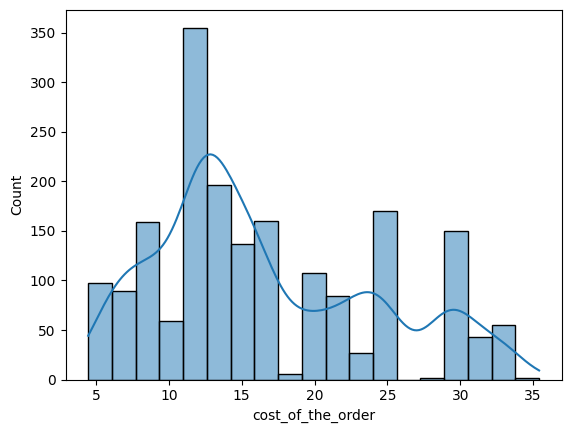

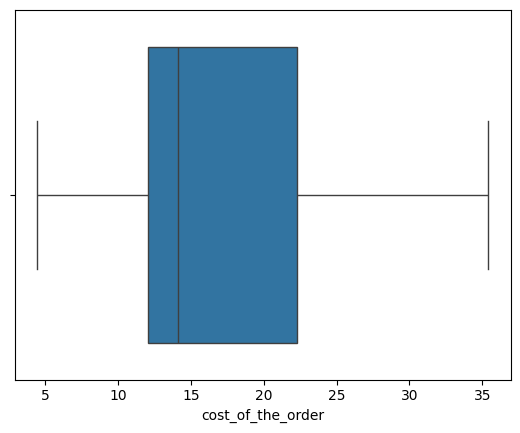

In [ ]:

sns.histplot(data = df, x='cost_of_the_order',kde=True)
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();

**Observations** :-

*  Above graphs show right skew distribution with no outliers.  
*   From the Histogram, we notice that the highesh frequency of the cost of
 food order is around 11 to 12 US Dollars.
*  The median cost of the order is approximately 14 USD and is less than the mean(16.50 USD) from the statistical summary derived .This implies that the distribution of cost of order is positively skewed, which shows that there are a few high values that are pushing mean higher than the median.
*   There are only few orders greater than 30 dollars.








**Food Preparation Time**

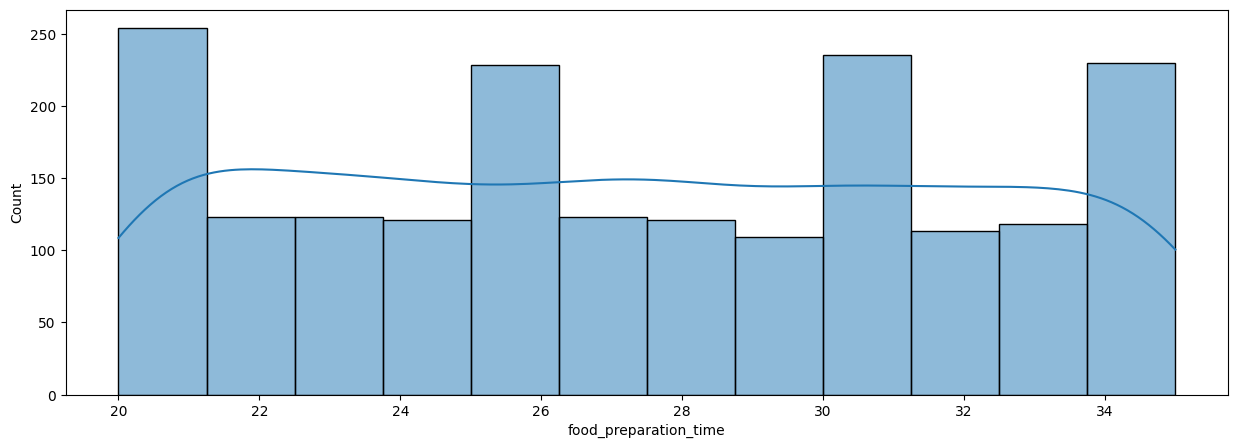

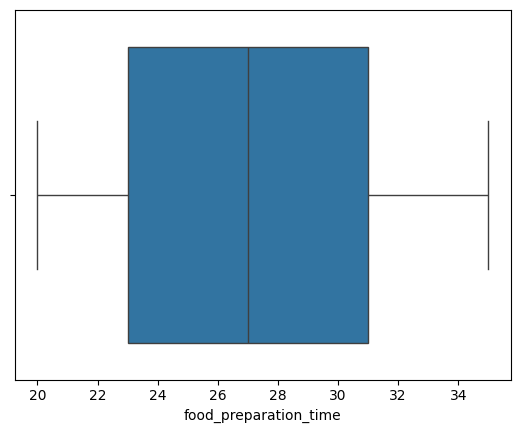

In [ ]:
# Analyzing the food preparation time

plt.figure(figsize=(15,5))
sns.histplot(data = df, x='food_preparation_time',kde = True)
plt.show()

sns.boxplot(data = df, x ="food_preparation_time");
plt.show()

**Observations**:-

*   Distribution is symmetrical as the median is at the center of the interquartile range.
*   There are no outliers present in the dataset.
* Majority of the food preparation time falls between 23 minutes and 31 minutes, with the average delivery time  around 27 minutes.
*  The highest time taken for food preparation is  35 minutes and the lowest times taken  is  20 minutes.






**Delivery Time**

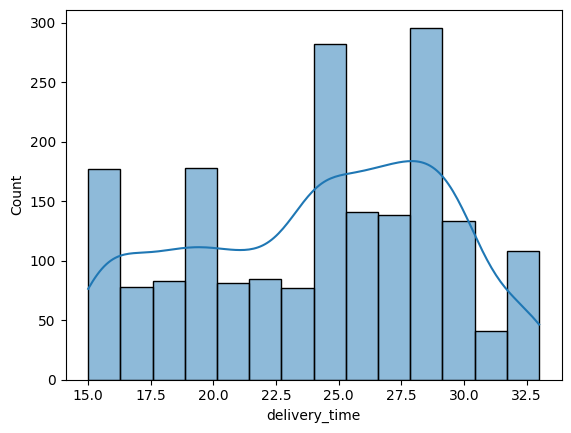

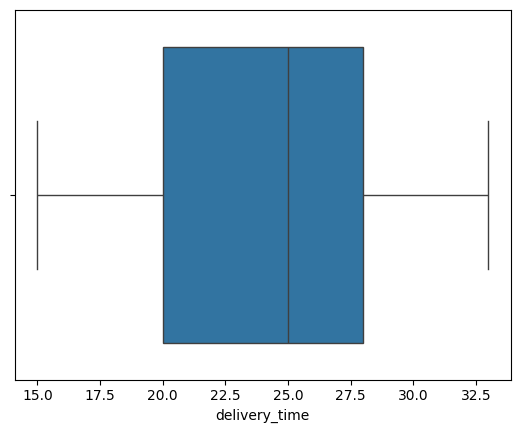

In [ ]:
sns.histplot(data = df, x='delivery_time', stat = 'count',kde = True,)
plt.show()
sns.boxplot(data = df, x='delivery_time')
plt.show();





*   The mean value for food delivery time is 24.16 minutes, which is very close to the median value 25 minutes in the boxplot implying that the data is roughly symmetric.
*   The distribution from the histogram seems to be skewed to the left.
*   Majority of the food delivery time falls between 20 and 28 minutes.
*   There are no outliers seen in the boxplot.







**Cuisine Type**

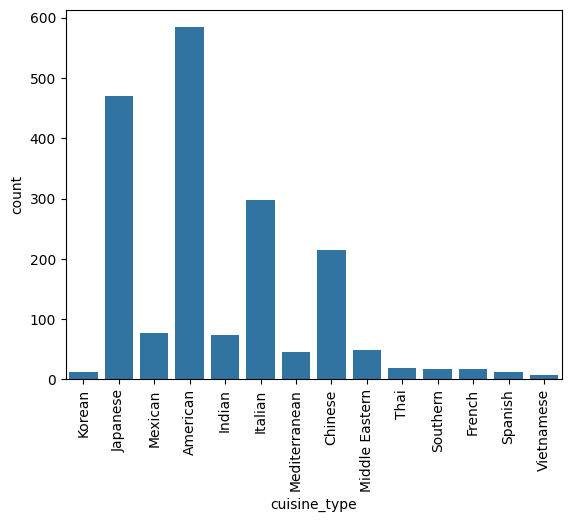

In [ ]:
# Order count per Cuisine
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

**Observations**:-

*  There are 14 types of cuisines offered.
*   The most popular cuisine ordered by Food Hub is American followed by Japanese,Italian and Chinese.
*   Vietnamese,Korean and Spanish are the least preferred cuisine.






**Rating:-**

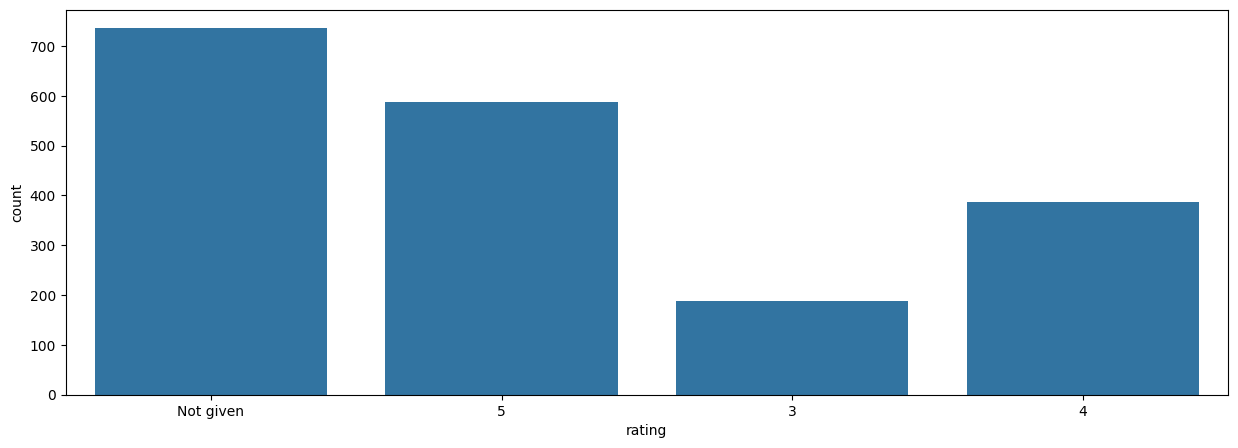

In [ ]:
# Food rating is an object Dtype. Therefore using a countplot to show the counts of observations in each categorical bin
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= 'rating');
plt.show()

**Observations**:-

*   Highest category falls under 'Not Given' which needs to be looked upon as to why customers are leaving without giving a rating.
*   Lowest category of rating falls under 3.



**Day of the Week**

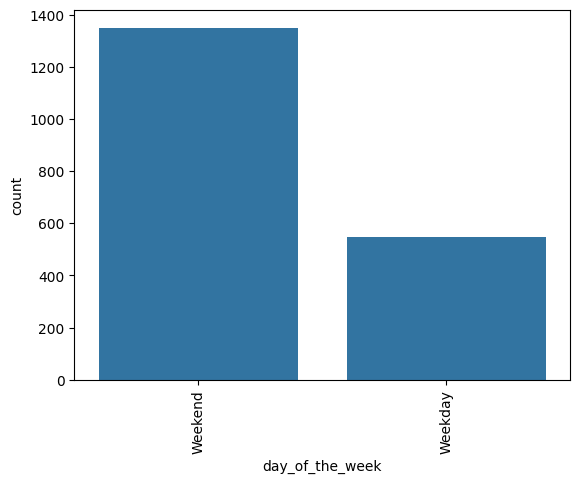

In [ ]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

**Observations**:-

*   There is more demand of ordering food using FoodHub on weekends when compared to weekdays




**Order_Id**

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

**Observations**:-
Order id is just an identifier to order a food and cannot be used for analysis.There are around 1898 unique orders.

**Customer ID**

In [ ]:
 # number of customers (unique) using FoodHub
print('The number of unique customers using FoodHub are:',df['customer_id'].nunique())

The number of unique customers using FoodHub are: 1200


**Observations**:-

There are around 1200 unique customers which means that there are customers who have placed more than one order using the FoodHub App.

**Restaurant Name**

In [ ]:
# Total number of restaurants (unique) participating in FoodHub

print('The number of unique restaurants participating in FoodHub are:',df['restaurant_name'].nunique())

The number of unique restaurants participating in FoodHub are: 178


**Observations**:-

There are around 178 restaurants participating in the FoodHub App.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 restaurants in terms of order received
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### **Observations:**

Shake shack is the leading restaurant with 219 orders followed by The Meatball Shop(132 orders),Blue Ribbon Sushi(119 orders), Blue Ribbon Fried Chick(96 orders) and Parm(68 orders) .


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()


,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### **Observations:**

American cuisines are the most popular cuisine during weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Filtering orders more than 20 Dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### **Observations**:

Around 29.24% of orders cost more than 20 US Dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# getting the mean delivery time
print('The mean delivery time for this dataset is', round(df['delivery_time'].mean(), 2))

The mean delivery time for this dataset is 24.16


#### **Observations**:

On an average , it takes around 24.16 minutes to have the orders placed from the FoodHub to be delivered.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Top 3  frequent customers eligble for 20% discount vouchers and number of orders they placed
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### **Observations**:

The top 3 customers that are using FoodHub app are with Customer Id's 52832,47440 and 83287 placing around 13,10 and 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Cuisine vs Cost of the order**

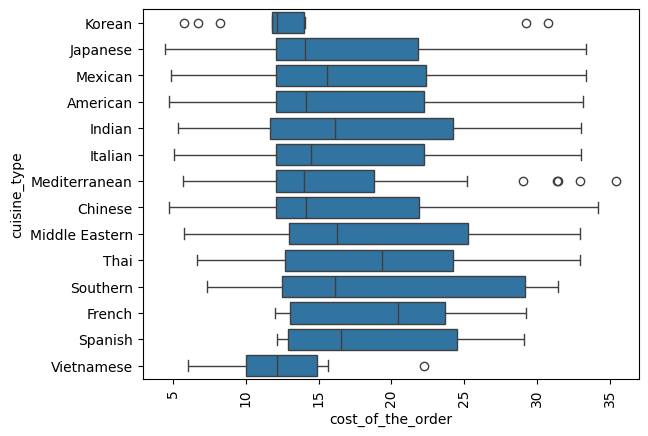

In [ ]:
# Relationship between cuisine and cost of the order
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

**Observations:-**

*   Outliers are present for the cost of Korean,Meditterenean and Vietnamese dishes indicating prices are a bit abnormal from usual range.
*   Meditterenean cuisine seems to be expensive.
*   Most of the cuisines have varying degree of skewed costs.






**Cost of the order for each cuisine type vs day of the week**

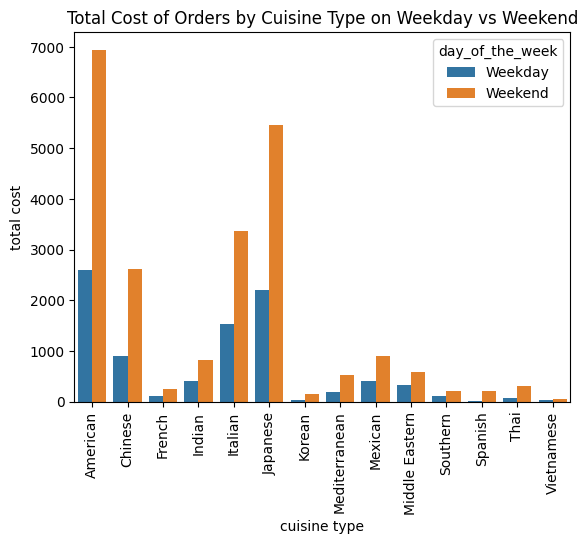

In [ ]:
# groupby cuisine_type and day_of_the_week
cusine_type_and_day = df.groupby(['cuisine_type','day_of_the_week'])
# get the sum of all the orders' costs
order_cost_sum = cusine_type_and_day['cost_of_the_order'].sum().reset_index()

# Ploting the results
sns.barplot(x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', data=order_cost_sum)
plt.title('Total Cost of Orders by Cuisine Type on Weekday vs Weekend')
plt.xlabel('cuisine type')
plt.ylabel('total cost')
plt.xticks(rotation=90);
plt.show()

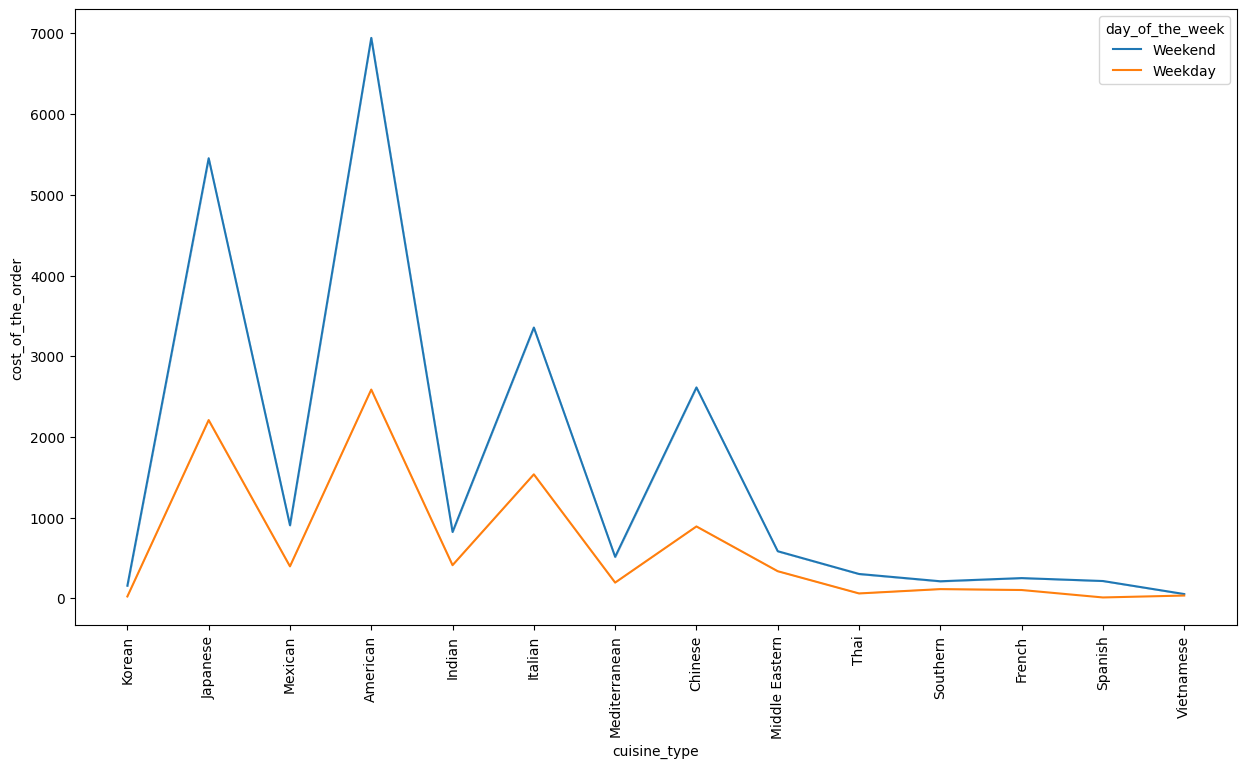

In [ ]:
# Plotting the results
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='day_of_the_week' , errorbar=('ci', False), estimator='sum')
plt.xticks(rotation=90);


**Observations**:-

*   American cuisine is the highesh revenue generator.
*   Demand seems to be low for the weekdays when compared to the weekends.
*   Regardless of the day of the week, the trend of the popularity remains consistent.



**Cuisine vs Food Preparation time**

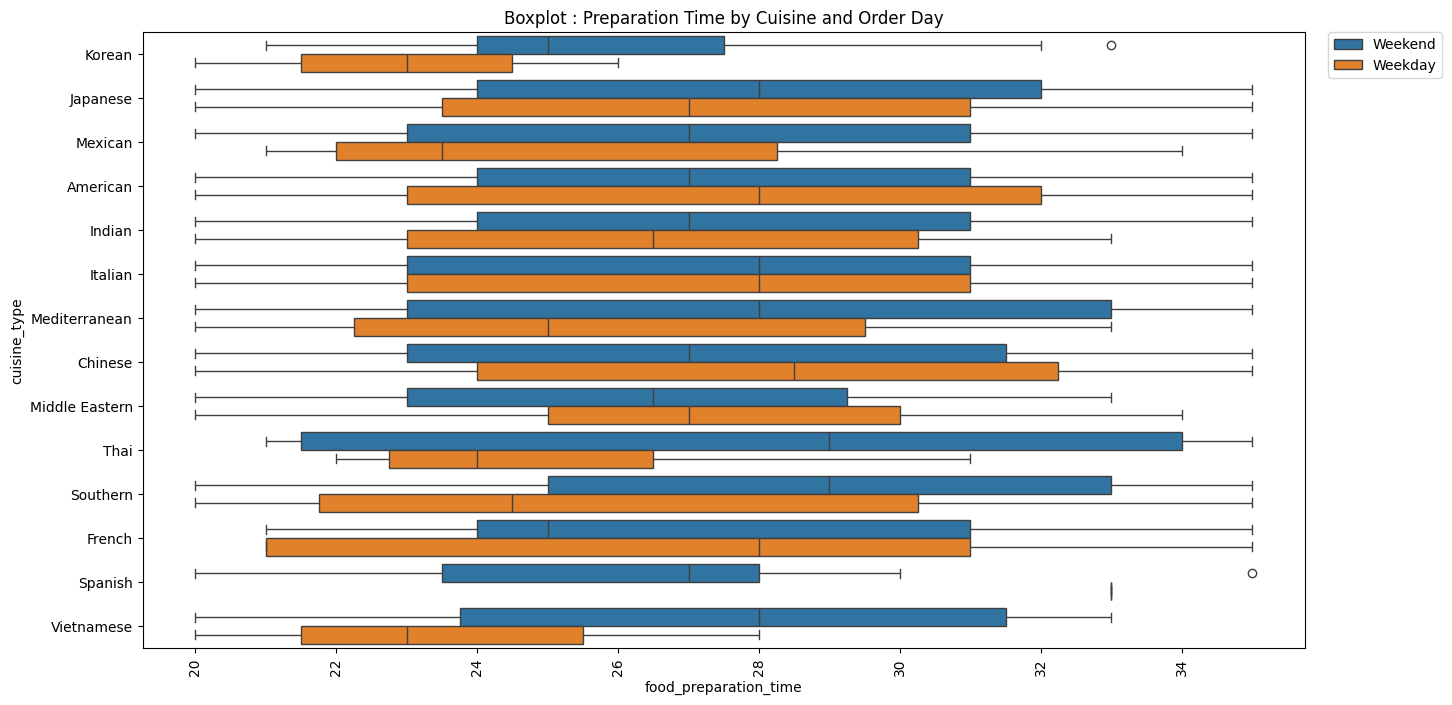

In [ ]:
# Analysis on the food preparation time by cuisine and order day
plt.figure(figsize=(15,8))
plt.title('Boxplot : Preparation Time by Cuisine and Order Day')
plt.xticks(rotation = 90)
sns.boxplot(data = df, y ="cuisine_type", x="food_preparation_time",hue = "day_of_the_week");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**Observations:-**

*   There are food outliers in both Spanish and Korean cuisine indicating that this may need further attention.

*   The food distribution of Itanlian cuisine looks even during both weekday and weekend indicating that the food preparation time is almost same for both day of the weeks.

*   Food preparation has more right skewed data during weekend.

**Day of the Week vs Delivery time**

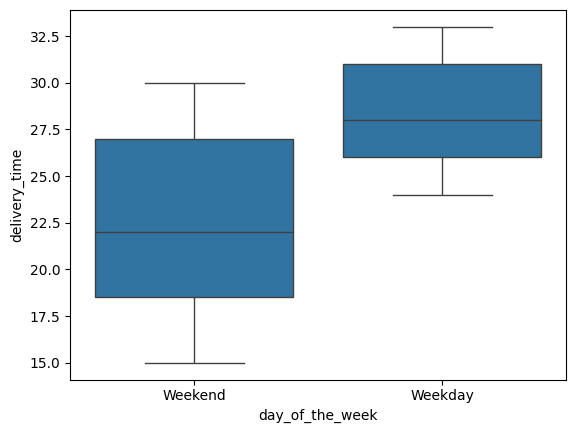

In [ ]:
# Relationship between day of the week and delivery time
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

**Observations:-**

*  The delivery time for all the orders over the weekends is less compared to weekdays. This could be due to heavy traffic during weekdays and the dip in traffic over the weekends.



**Rating vs Delivery time**

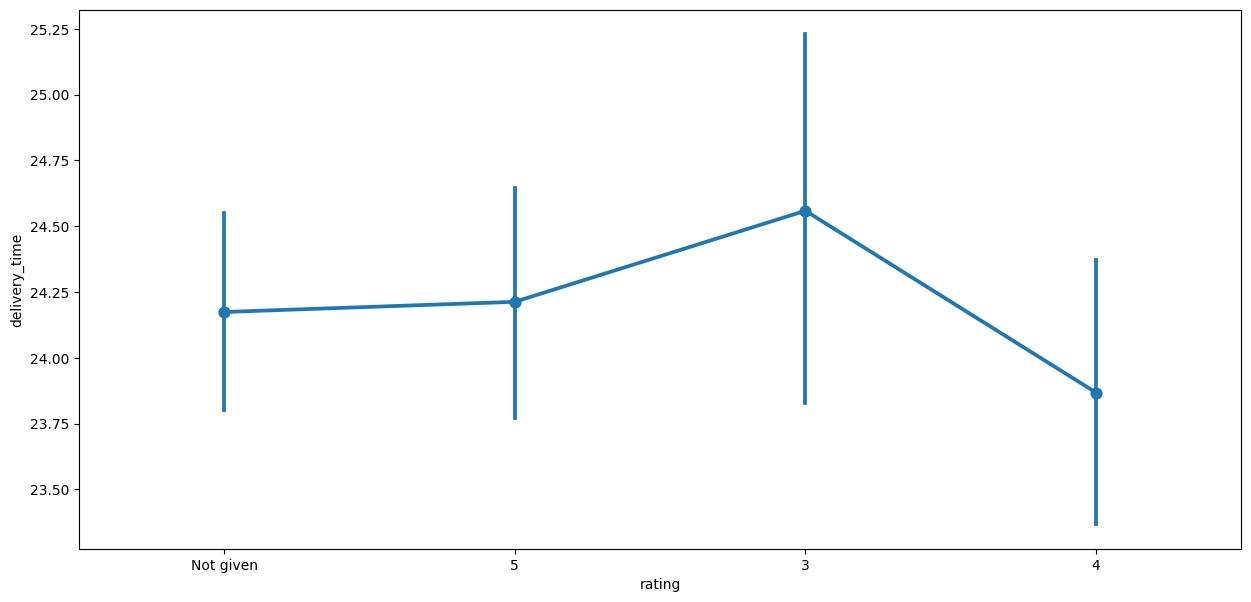

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

**Observations:-**

1.   There seems to be a possibility of the delivery time impacting the rating
2.   From the above, it seems that rating 3 is given for those that took long time to deliver.





**Rating vs Food Preparation Time**

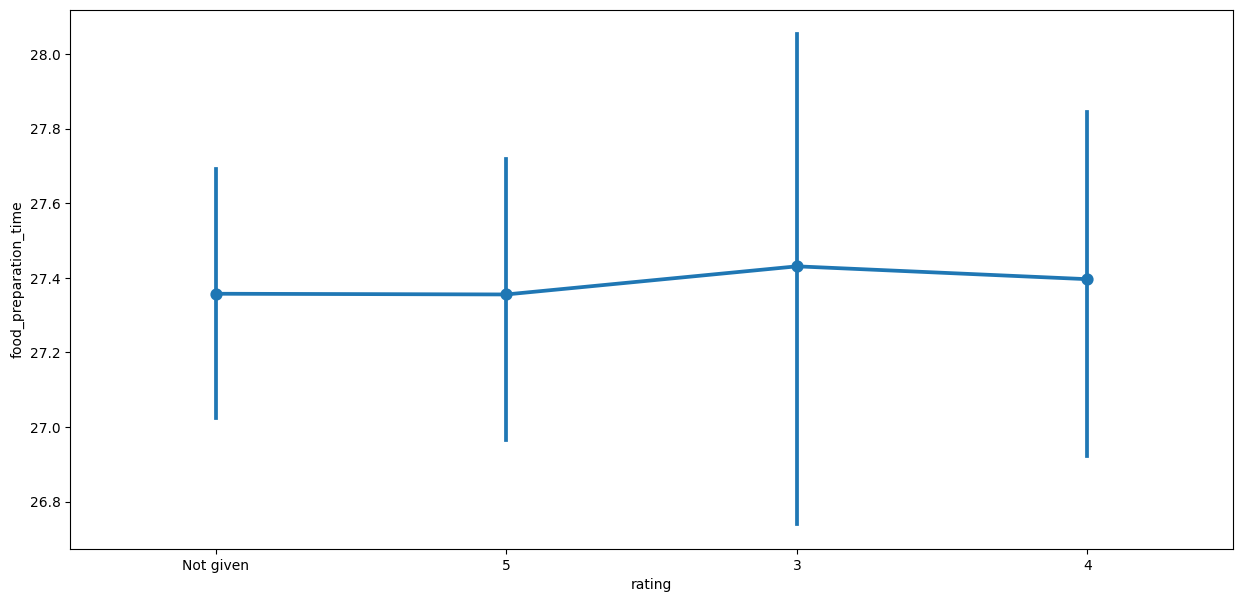

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

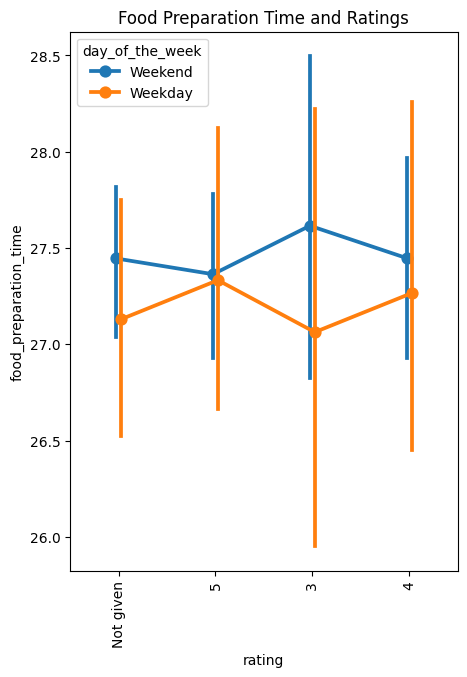

In [ ]:
# Rating and Food Preparation time during day of the week
plt.figure(figsize=(5,7))
plt.title('Food Preparation Time and Ratings')
plt.xticks(rotation = 90)
sns.pointplot(data = df, x ="rating", y="food_preparation_time", hue = "day_of_the_week", dodge = True);
plt.show()


**Observations:-**

*  All food ratings seems to have a higher average value for weekend.
*  It can also be observed that the rating goes down as food preparation time takes more.This is something that needs to be looked up.




**Rating vs Cost of the Order**

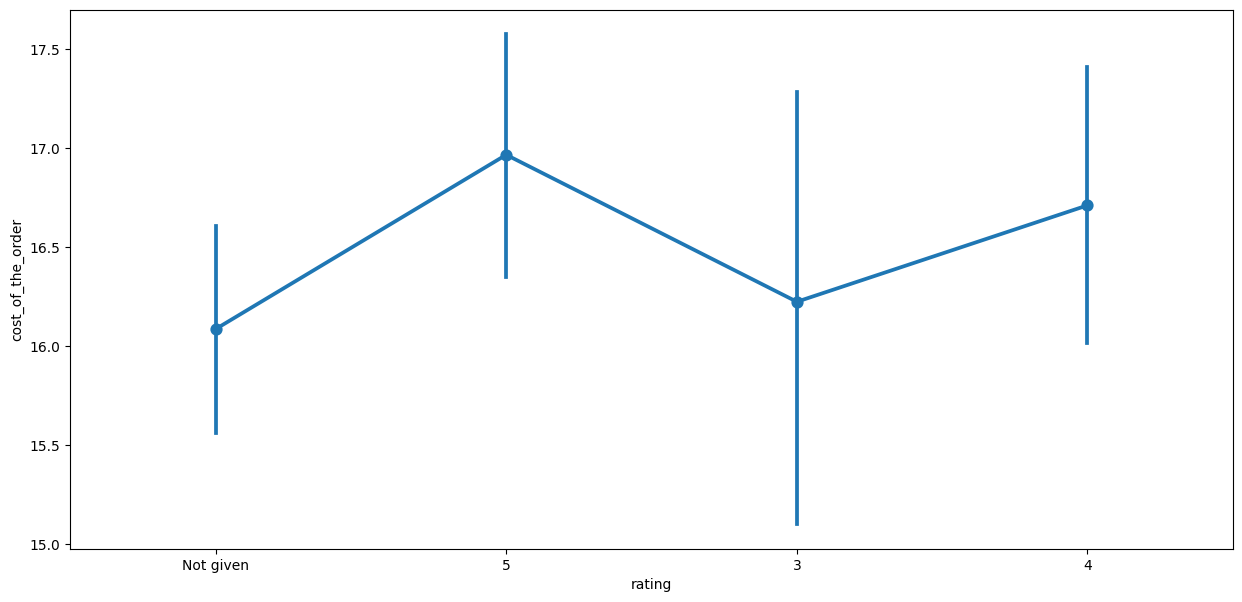

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

**Observations:-**

It seems that high-cost orders have been rated well and low-cost orders have not been rated.

**Cost vs Food Preparation Time**

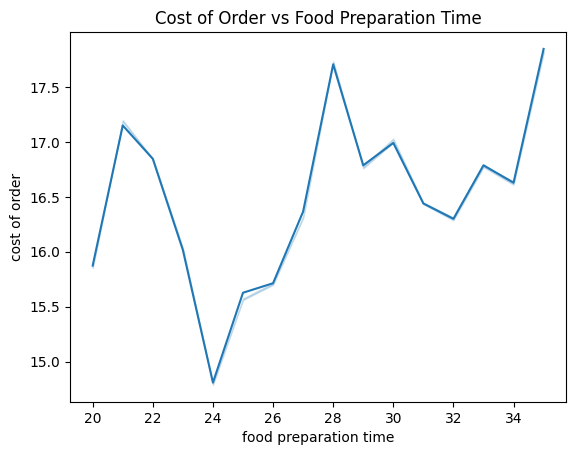

In [ ]:
sns.lineplot(data=df, y='cost_of_the_order', x='food_preparation_time', errorbar=('ci',True));
plt.title('Cost of Order vs Food Preparation Time')
plt.xlabel('food preparation time')
plt.ylabel('cost of order')
plt.show()

**Observations:-**

As the food preparation time increase so does the cost of the order.



**Observation using Heatmap**

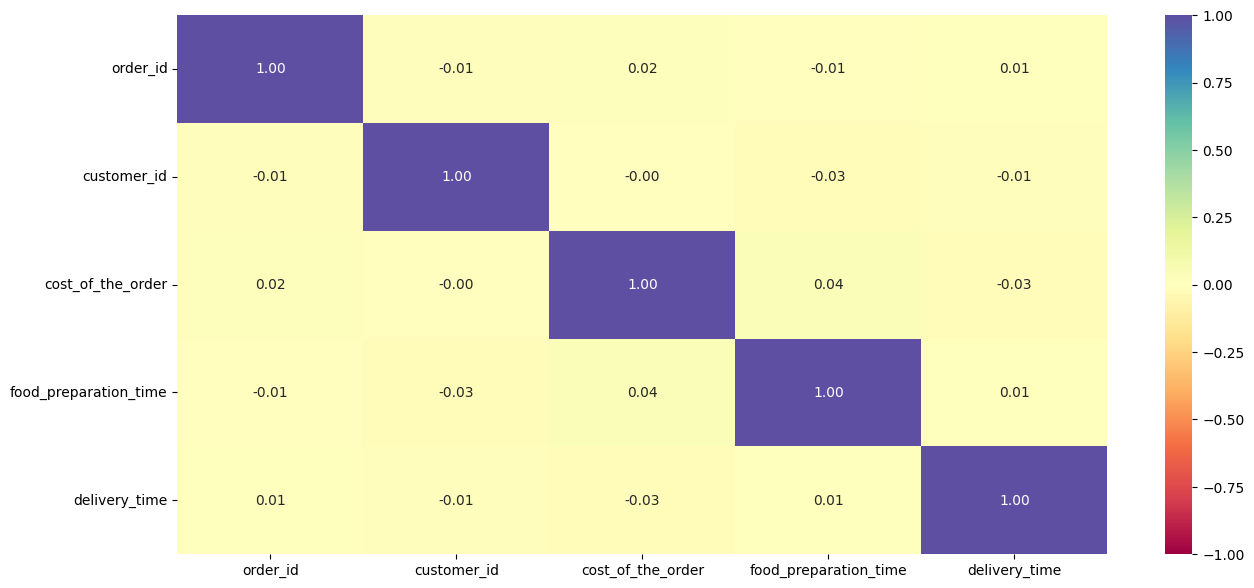

In [ ]:
corr = df.corr(numeric_only=True)

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:-**


*  The heatmap shows very weak correlation between the variables.
*  The cost of the order has a slightly positive correlation with food preparation time, indicating as cost of the order increases,time taken to prepare food might also slightly increase.


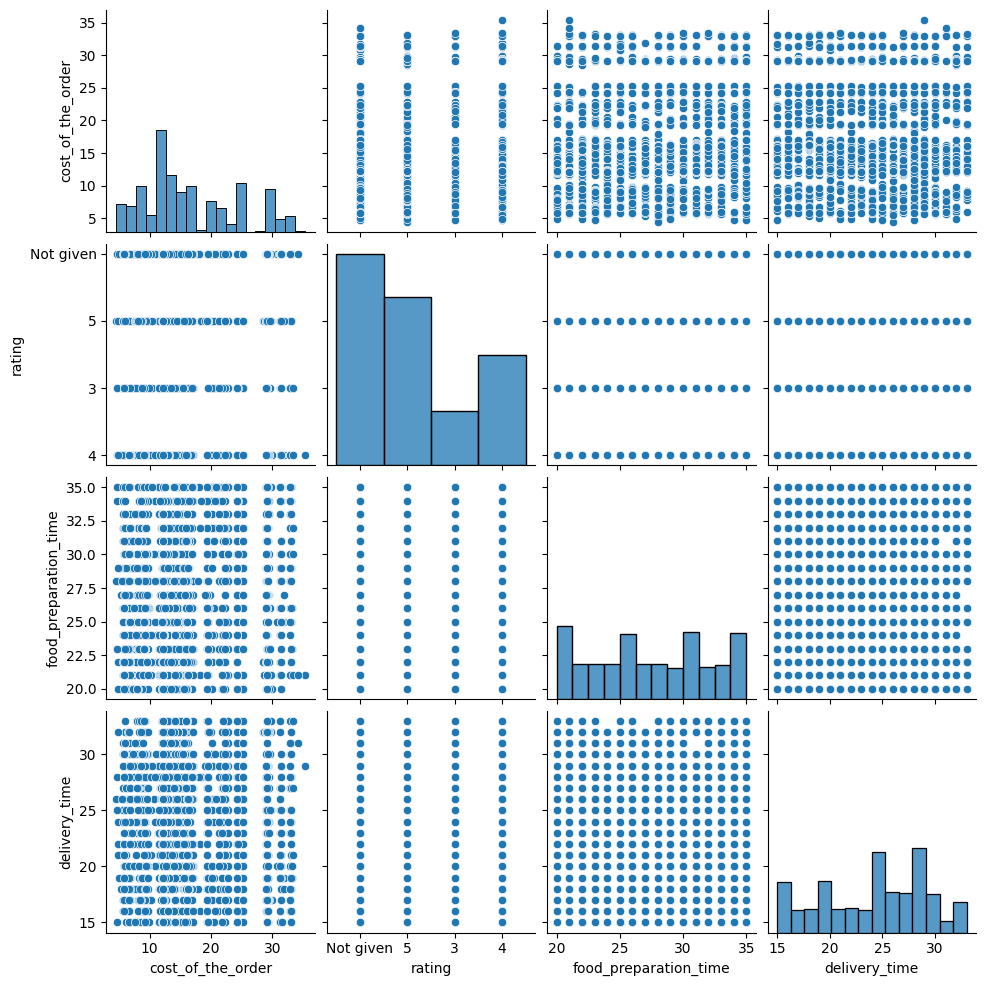

In [ ]:
sns.pairplot(df, vars = ["cost_of_the_order","rating","food_preparation_time","delivery_time"], dropna = True)
plt.show();

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Filter the restaurant's column for those restaurants that do not have a rating as 'Not given'
orders_with_ratings = df[df['rating'] != 'Not given'].copy()

#Convert the rating column created above from object to integer datatype
orders_with_ratings['rating'] = orders_with_ratings['rating'].astype('int')

#Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = orders_with_ratings.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

#Get all the restaurant names that have a rating count of more than 50
restaurant_name = df_rating_count[df_rating_count['rating'] >50]['restaurant_name']

# Check if restaurant_names with count > 50 is in the df_copy data frame
res_criteria = orders_with_ratings[orders_with_ratings['restaurant_name'].isin(restaurant_name)].copy()

#find the mean rating of the restaurants by using the group by function
res_criteria.groupby('restaurant_name')[['rating']].mean().sort_values('rating', ascending=False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### **Observations**:

The restaurants fulfilling the criteria to get the promotional offer are: 'The Meatball Shop','Blue Ribbon Fried Chicken','Shake Shack' and 'Blue Ribbon Sushi'.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
 ## Function to determine the data and calling out the revenue column to calculate the total revenue
 def compute_rev(cost):
    if cost > 20:
        return cost*0.25
    elif cost > 5:
        return cost*0.15
    else:
        return cost*0
 df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
Total_Net_Rev = df['Revenue'].sum()
 print("Total net revenue is",round (Total_Net_Rev, 2),'dollars')

Total net revenue is 6166.3 dollars


#### **Observations**:

The Net Revenue generated by FoodHub company across all orders is USD 6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# find the percentage of orders that have more than 60 minutes of total delivery time
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### **Observations**:

About 10.54% of orders take more than 60 minutes to prepare and deliver.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Mean delivery time during day of the week
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


#### **Observations**:

The mean delivery time during the weekday is 28.34 minutes.
The mean delivery time during the weekend is 22.47 minutes.





### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions**:


*   There is a total of 178 types of restaurant registered with FoodHub. However, the preferred top 5 restaurants orders repeatedly are : Shake Shack : American cuisine (219 orders), The Meatball Shop : Italian (132 orders), Blue Ribbon Sushi : Japanese (119 orders), Blue Ribbon Fried Chicken : American (96 orders), Parm : Italian (68).

*   The top cuisine types irrespective of the day of the week still remains same with the American as the top followed by Japanese,Italian and Chinese.These are the top revenue generators for the FoodHub.


*   The least demand cuisines are Vietnamese,Korean and Spanish.



*   The demand in ordering food using FoodHub app is significantly higher during the weekend when compared to the weekdays.


*   Around 11% of orders take more than an hour to get delivered from the time the order is placed.


*  The Net Revenue generated by FoodHub company across all orders is USD 6166.30.

*   To get a comprehensive analysis of foodhub's quality of service all customers must be encouraged to rate their service .

*  Most of the ratings fall between the high score of 5 and 4, it is probable that only extremely happy customers take the time to rank the service. However, a significant amount of information—about 38%—is lost in the unrated orders.

*   We would need to investigate further as to the reason for low count of food orders and with Ratings = '3' on both weekday and weekend.Delay in delivery can be one reason for the rating to be low.

*   Higher the time for food preparation the higher the cost of the order.

*   Weekday orders take more time to deliver than weekend orders and this might be due to the extra traffic during the weekdays.


### **Recommendations**:

*   Define methods to improve the customers' response rating to their orders, mainly to reduce the rating 'Not given' on the orders. Provide incentives that encourage the customer to rate their order .

*   FoodHub should integrate more with restaurants serving American, Japanese, Italian and Chinese cuisines as these cuisines are very popular among FoodHub customers.Trying to Offer promotional advertisments for these top restaurants on the FoodHub app has the potential to drive more demand for these restaurants and generate more revenue for the FoodHub App.

*   Investigate  why delivery times increase on the weekdays.As a measure to improve customer delivery times, FoodHub could recruit more delivery people during weekday rush hour, or also find ways to optimize traffic routing on their app to avoid areas with heavy traffic on weekdays.

*    FoodHub should incentivize customers to leave honest reviews which can help in driving business.

*   The experience of food ordering and consuming should be satisfying and convenient which also involves reasonably fast food delivery time. The App can use the average delivery time details to display the estimated delivery time for user decision, before placing an order.

*  Send  a quick reminder to customers to rate the food and offer a gift to attract them. This will surely encourage the users to Rate the food ordered.

*   For the bottom  cuisine popularity (ie. Vietnamese, Korean, Spanish), tying up a promotional strategy with these restaurants can boost their sales. We can try Offering the customer  with a Purchase Coupon from any of these restaurants for the next order which can encourage the customers to come back.

---